## R Lab number 4 from (Statistical Learning - Applications In R)

### Machine Learning Classification Methods
    
Given _Smarket data_ , containing variables such as **Volume** (Number of shares traded on the previous date) **Today** (percentagem return of the stock from the start up to the date in question) and **Direction** (wether the market was Up or Down on the referred date). 

Each instance represents one specific date;

**'Lag1'** to **'Lag5'** are the percentage returns for each of the five previous trading days;

The Goal is to predict **Direction** (dependent variable) using other features.

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Load the Smarket data set
Smarket = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Smarket.csv")

# renaming first column to "instance"

Smarket.rename(columns = {'Unnamed: 0' : 'Instance'}, inplace=True)

# Describe Dataset

print(Smarket.tail())

print("\n") # Just making code more ~spaced out~ for a better understanding

# Display the variable names
print("Variable Names: ", Smarket.columns)
print("\n")
# Display the dimensions of the data set
print("Dataset Dimensions", Smarket.shape)
print("\n")
# Display summary statistics of the data set
print(Smarket.describe())

# Create a pairs plot
sns.pairplot(Smarket)

      Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today  \
1245        1246  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043   
1246        1247  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955   
1247        1248  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130   
1248        1249  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298   
1249        1250  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489   

     Direction  
1245        Up  
1246      Down  
1247        Up  
1248      Down  
1249      Down  


Variable Names:  Index(['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume',
       'Today', 'Direction'],
      dtype='object')


Dataset Dimensions (1250, 10)


        Unnamed: 0         Year         Lag1         Lag2         Lag3  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean    625.500000  2003.016000     0.003834     0.003919     0.001716   
std     360.988227     1.4090

In [29]:
# Calculate the correlation matrix of the Smarket data set
# Note: this will result in an error in R because the "Direction" column is non-numeric
# In Python, we can still calculate the correlation matrix, but we need to exclude the non-numeric "Direction" column

corr_matrix = Smarket.corr()

# Display the correlation matrix
print(corr_matrix)

# Alternatively, we can calculate the correlation matrix using only the numeric columns of the data set
# This is equivalent to excluding the "Direction" column in R
# numeric_cols = Smarket.drop(columns=["Direction"])
# corr_matrix_numeric = numeric_cols.corr()

# Display the correlation matrix using only the numeric columns
# print(corr_matrix_numeric)

            Unnamed: 0      Year      Lag1      Lag2      Lag3      Lag4  \
Unnamed: 0    1.000000  0.979773  0.035415  0.036022  0.038989  0.041437   
Year          0.979773  1.000000  0.029700  0.030596  0.033195  0.035689   
Lag1          0.035415  0.029700  1.000000 -0.026294 -0.010803 -0.002986   
Lag2          0.036022  0.030596 -0.026294  1.000000 -0.025897 -0.010854   
Lag3          0.038989  0.033195 -0.010803 -0.025897  1.000000 -0.024051   
Lag4          0.041437  0.035689 -0.002986 -0.010854 -0.024051  1.000000   
Lag5          0.035025  0.029788 -0.005675 -0.003558 -0.018808 -0.027084   
Volume        0.546348  0.539006  0.040910 -0.043383 -0.041824 -0.048414   
Today         0.035273  0.030095 -0.026155 -0.010250 -0.002448 -0.006900   

                Lag5    Volume     Today  
Unnamed: 0  0.035025  0.546348  0.035273  
Year        0.029788  0.539006  0.030095  
Lag1       -0.005675  0.040910 -0.026155  
Lag2       -0.003558 -0.043383 -0.010250  
Lag3       -0.018808 -0.

C:\Users\pedro\AppData\Local\Temp\ipykernel_15984\3066322186.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Smarket.corr()


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1249,1250,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


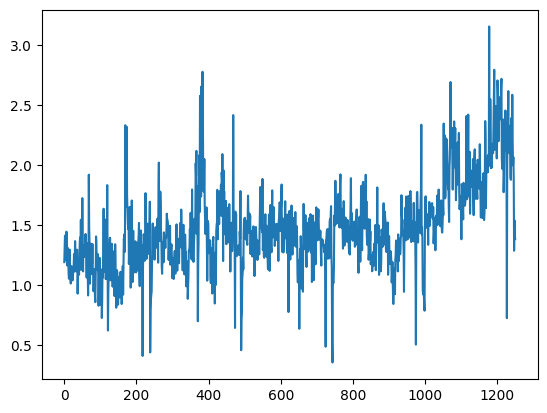

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1249,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Smarket data into a pandas DataFrame
Smarket = pd.read_csv('Smarket.csv')

# Attach the data frame so that its variables can be accessed by name without $ notation
# pd.options.mode.chained_assignment = None  # disable the SettingWithCopyWarning

Smarket = Smarket.drop(columns=['Unnamed: 0'])

# Create a plot of the Volume variable
plt.plot(Smarket['Volume'])
plt.show()

Smarket.tail()

In [4]:
# note that statsmodels.formula.api is a submodule from statsmodels. The statsmodels.formula provides a formula framework for
# specifying statistical models in Python It makes possible to specify models using R-style formulas

import statsmodels.formula.api as smf

# Load Smarket.csv file into a pandas dataframe

Smarket = pd.read_csv('Smarket.csv')

# Fit a logistic regression model to predict Direction based on Lag1, Lag2, Lag3, Lag4, Lag5 and Volume
# GLM Stands for: Generalized Linear Model

glm_fit = smf.glm('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=Smarket, family=sm.families.Binomial()).fit()

# Print a summary of the fitted model
print(glm_fit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Fri, 21 Apr 2023   Deviance:                       1727.6
Time:                                          11:10:09   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                              nonrobust                                         
                 coef    std e

### So next, given the correlation between volume and year, it's convenient to try a Generalized Linear Model

See what happens

In [5]:
# Load the Smarket data
smarket = pd.read_csv('Smarket.csv', index_col=0, parse_dates=True)

# Create the logistic regression model
glm_fit = sm.formula.glm(
    formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',
    data=smarket,
    family=sm.families.Binomial()
).fit()

# Print the coefficients
print(glm_fit.params)

# Print the summary of the coefficients
print(glm_fit.summary().tables[1])

# Print the Pr(>|z|) values for the coefficients
print(glm_fit.summary().tables[1].data[4])

Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
['Lag3', '   -0.0111', '    0.050', '   -0.222', ' 0.824', '   -0.109', '    0.087']


In [6]:
# Predict the probabilities of the market going up
glm_prods = glm_fit.predict()

# Print the first ten probabilities
print(glm_prods[0:10])

# Create a dictionary for the Direction variable
Direction = {"Down": 0, "Up": 1}

# Create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5
glm_pred = ["Down"] * 1250
glm_pred = ["Up" if p > 0.5 else "Down" for p in glm_prods]

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# load data
smarket = pd.read_csv('Smarket.csv')
Direction = smarket['Direction']

# set training data
train = smarket['Year'] < 2005
X_train = smarket[train][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = Direction[train]

# set test data
test = smarket['Year'] == 2005
X_test = smarket[test][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_test = Direction[test]

# fit logistic regression model
glm_fit = LogisticRegression(random_state=0).fit(X_train, y_train)

# predict the probabilities that the market will go up for the test data
glm_probs = glm_fit.predict_proba(X_test)[:,1]

# Create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5
glm_pred = np.where(glm_probs > 0.5, "Up", "Down")

# create confusion matrix
confusion_matrix = pd.crosstab(glm_pred, y_test)
print(confusion_matrix)

# calculate the fraction of correct predictions
correct_pred = np.sum(np.diagonal(confusion_matrix))
total_pred = np.sum(confusion_matrix.values)
fraction_correct = correct_pred / total_pred
print(fraction_correct)

Direction  Down  Up
row_0              
Down         74  93
Up           37  48
0.48412698412698413


In [8]:
# Create a boolean mask for observations from 2001 through 2004
train = (Smarket['Year'] < 2005).values

# Create held-out data set of observations from 2005
Smarket_2005 = Smarket[~train]
print(Smarket_2005.shape)

# Create vector of directions for held-out data set
Direction_2005 = Direction[~train]

(252, 10)


252 indicates the number of rows in the data structure, 10 indicates the number of columns.

#### The train set refers to the subset of observations from the stock market data set that correspond to dates before 2005. The test set, on the other hand, refers to the subset of observations from the stock market data set that correspond to dates in 2005.

now, the linear fit should look like:

In [9]:
from sklearn.linear_model import LogisticRegression

X_train = Smarket.loc[train, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = Smarket.loc[train, 'Direction']
glm_fit = LogisticRegression().fit(X_train, y_train)

# Obtain predicted probabilities of the stock market going up for each of the days in our test set
X_test = Smarket_2005[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
glm_probs = glm_fit.predict_proba(X_test)[:, 1]

glm_pred = np.where(glm_probs > 0.5, 'Up', 'Down')
accuracy = np.mean(glm_pred == Smarket_2005['Direction'])
error_rate = np.mean(glm_pred != Smarket_2005['Direction'])

print(accuracy)
print(error_rate)

0.48412698412698413
0.5158730158730159


48% of accuracy is as bad as randon picking anything lol

removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model:

In [10]:
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, 'Direction']
glm_fit = LogisticRegression().fit(X_train, y_train)

# Obtain predicted probabilities of the stock market going up for each of the days in our test set
X_test = Smarket_2005[['Lag1', 'Lag2']]
glm_probs = glm_fit.predict_proba(X_test)[:, 1]

glm_pred = np.where(glm_probs > 0.5, 'Up', 'Down')
accuracy = np.mean(glm_pred == Direction_2005)
error_rate = np.mean(glm_pred != Direction_2005)

print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.5595238095238095
Error rate: 0.44047619047619047


it just got better

In [11]:
X_new = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})
glm_probs = glm_fit.predict_proba(X_new)[:, 1]

# Print predicted probabilities of Direction = 'Up'
print(glm_probs)

[0.47922465 0.49614354]


The above output is the prediction of Direction on a day when Lag1 and Lag2 equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8

### Now for Linear Discriminant Analysis

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# That's the library to use in order to achieve LDA

In [13]:
train = (Smarket['Year'] < 2005).values

# Create LDA model using Lag1 and Lag2 as predictors
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, 'Direction']
lda_fit = LinearDiscriminantAnalysis().fit(X_train, y_train)

# Display the prior probabilities and group means
print("Prior probabilities of groups:")
print(lda_fit.priors_)

print("Group means:")
print(lda_fit.means_)

Prior probabilities of groups:
[0.49198397 0.50801603]
Group means:
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


### Ok this output represents a few things:

1) The "Prior probabilities of groups" refer to the prior probabilities of the two levels of the "Direction" variable, which are "Up" and "Down".

2) The first number (0.49198397) represents the prior probability of the "Down" level, while the second number (0.50801603) represents the prior probability of the "Up" level.

3) These numbers indicate that there were slightly more "Up" days than "Down" days in the training set.

4) The "Group means" refer to the means of the "Lag1" and "Lag2" variables for each level of the "Direction" variable. The first row represents the means for the "Down" level, and the second row represents the means for the "Up" level. The first column represents the mean of the "Lag1" variable, and the second column represents the mean of the "Lag2" variable. These numbers indicate that, on average, the "Lag1" and "Lag2" values were slightly higher on "Down" days than on "Up" days.

Coefficients of linear discriminants:
[[-0.05544078 -0.0443452 ]]


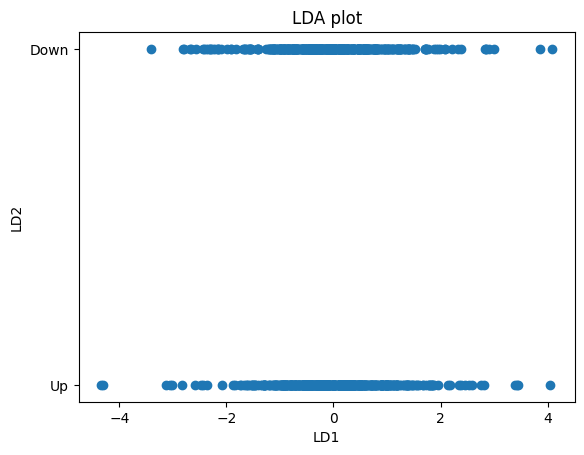

In [14]:
print("Coefficients of linear discriminants:")
print(lda_fit.coef_)

plt.figure()
plt.title('LDA plot')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_fit.transform(X_train), y_train)
plt.show()

C:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\pedro\AppData\Local\Temp\ipykernel_15984\2281583769.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train['Lag1'], X_train['Lag2'], c = 'blue', cmap='coolwarm')


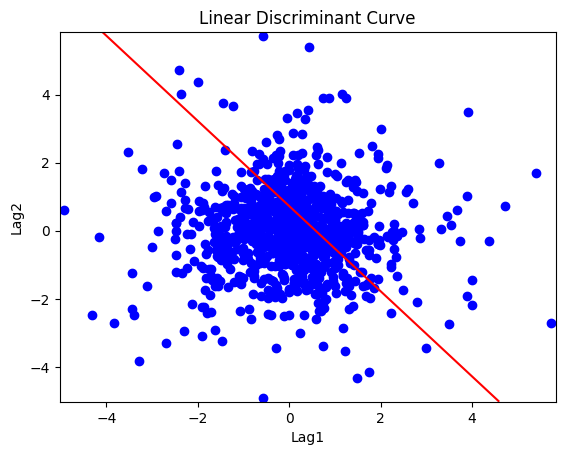

In [15]:
# plotting the curve of the results based

import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train['Lag1'].min() - 0.1, X_train['Lag1'].max() + 0.1
y_min, y_max = X_train['Lag2'].min() - 0.1, X_train['Lag2'].max() + 0.1


xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = lda_fit.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.scatter(X_train['Lag1'], X_train['Lag2'], c = 'blue', cmap='coolwarm')
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.title('Linear Discriminant Curve')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# set test data
test = smarket['Year'] == 2005
X_test = smarket[test][['Lag1', 'Lag2']]
y_test = Direction[test]

# make predictions
lda_pred = lda_fit.predict(X_test)

# calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, lda_pred)

# create confusion matrix
cm = confusion_matrix(y_test, lda_pred)

# add labels to rows and columns
cm_df = pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['Actual Down', 'Actual Up'])

print(cm_df)

print('Accuracy:', accuracy)

             Predicted Down  Predicted Up
Actual Down              35            76
Actual Up                35           106
Accuracy: 0.5595238095238095


In [17]:
# check number of instances where posterior probability of Down is less than 0.5
print(np.sum(lda_fit.predict_proba(X_test)[:, 0] < 0.5))

# print the posterior probabilities of first 20 instances for the first group
print(lda_fit.predict_proba(X_test[:20])[:, 0])

# check number of instances where posterior probability of Down is greater than 0.9
print(np.sum(lda_fit.predict_proba(X_test)[:, 0] > 0.9))

182
[0.49017925 0.4792185  0.46681848 0.47400107 0.49278766 0.49385615
 0.49510156 0.4872861  0.49070135 0.48440262 0.49069628 0.51199885
 0.48951523 0.47067612 0.47445929 0.47995834 0.49357753 0.50308938
 0.49788061 0.48863309]
0


### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# subset the training set
train = Smarket['Year'] < 2005

# create Naive Bayes model using Lag1 and Lag2 as predictors
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, 'Direction']
nb_fit = GaussianNB().fit(X_train, y_train)

# print prior probabilities and conditional probabilities
print("Prior probabilities of groups:")
print(nb_fit.class_prior_)
print("Conditional probabilities:")
print(nb_fit.theta_)

Prior probabilities of groups:
[0.49198397 0.50801603]
Conditional probabilities:
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [19]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Subset the training set
train = Smarket['Year'] < 2005

# Calculate mean and standard deviation of Lag1 for instances where Direction is "Down" in the training set
print(np.mean(Smarket.loc[train & (Smarket['Direction'] == 'Down'), 'Lag1']))
print(np.std(Smarket.loc[train & (Smarket['Direction'] == 'Down'), 'Lag1']))

# Create Naive Bayes model using Lag1 and Lag2 as predictors
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, 'Direction']
nb_fit = GaussianNB().fit(X_train, y_train)

0.04279022403258655
1.226195046492573


The output shows the mean and standard deviation of the 'Lag1' variable for the instances in the training set where the 'Direction' variable is equal to "Down".

The mean of 'Lag1' for instances where the market moved down is 0.0428, which indicates a small positive average return on the previous day's performance.

The standard deviation of 'Lag1' for instances where the market moved down is 1.226, which indicates a relatively high variability in the previous day's performance.

In [20]:
# Predict the Direction for the 2005 test set using the Naive Bayes model
nb_class = nb_fit.predict(Smarket.loc[~train, ['Lag1', 'Lag2']])
print(pd.crosstab(index=nb_class, columns=Smarket.loc[~train, 'Direction'])
        .rename_axis(index=None, columns=None), "\n")

# Predict the posterior probabilities of the test set using the Naive Bayes model
nb_preds = nb_fit.predict_proba(Smarket.loc[~train, ['Lag1', 'Lag2']])
print(nb_preds[:5], "\n")

# Calculate the accuracy of the Naive Bayes model
print(np.mean(nb_class == Smarket.loc[~train, 'Direction']))

      Down   Up
Down    29   20
Up      82  121 

[[0.4873288  0.5126712 ]
 [0.47623584 0.52376416]
 [0.46529531 0.53470469]
 [0.47484469 0.52515531]
 [0.49020587 0.50979413]] 

0.5952380952380952


First, the code predicts the direction of the stock market for the test set (year 2005) using the Naive Bayes model that was trained using the Lag1 and Lag2 variables. First, the code predicts the direction of the stock market for the test set (year 2005) using the Naive Bayes model that was trained using the Lag1 and Lag2 variables. 

The posterior probabilities shows the probabilities of the market going down or up, respectively, for the first five instances in the test set.

It predicted 29 instances of the market going down when it actually went down, 20 instances of the market going down when it actually went up, 82 instances of the market going up when it actually went down, and 121 instances of the market going up when it actually went up. The accuracy of the model is 0.595, which means that it correctly predicted the direction of the stock market about 60% of the time. 

### Now for K-Nearest Neighbors

In [21]:
# Compute the correlation matrix
corr_matrix = Smarket.corr()
print(corr_matrix)

# Compute the correlation matrix without the Direction column
corr_matrix_no_direction = Smarket.iloc[:, :-1].corr()
print(corr_matrix_no_direction)

            Unnamed: 0      Year      Lag1      Lag2      Lag3      Lag4  \
Unnamed: 0    1.000000  0.979773  0.035415  0.036022  0.038989  0.041437   
Year          0.979773  1.000000  0.029700  0.030596  0.033195  0.035689   
Lag1          0.035415  0.029700  1.000000 -0.026294 -0.010803 -0.002986   
Lag2          0.036022  0.030596 -0.026294  1.000000 -0.025897 -0.010854   
Lag3          0.038989  0.033195 -0.010803 -0.025897  1.000000 -0.024051   
Lag4          0.041437  0.035689 -0.002986 -0.010854 -0.024051  1.000000   
Lag5          0.035025  0.029788 -0.005675 -0.003558 -0.018808 -0.027084   
Volume        0.546348  0.539006  0.040910 -0.043383 -0.041824 -0.048414   
Today         0.035273  0.030095 -0.026155 -0.010250 -0.002448 -0.006900   

                Lag5    Volume     Today  
Unnamed: 0  0.035025  0.546348  0.035273  
Year        0.029788  0.539006  0.030095  
Lag1       -0.005675  0.040910 -0.026155  
Lag2       -0.003558 -0.043383 -0.010250  
Lag3       -0.018808 -0.

C:\Users\pedro\AppData\Local\Temp\ipykernel_15984\769700146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Smarket.corr()


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
train = Smarket['Year'] < 2005
train_X = Smarket.loc[train, ['Lag1', 'Lag2']]
test_X = Smarket.loc[~train, ['Lag1', 'Lag2']]
train_direction = Smarket.loc[train, 'Direction']

# Set the random seed and fit the KNN model
np.random.seed(1)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_direction)

# Make predictions on the test set and display the results
knn_preds = knn_model.predict(test_X)
print(pd.crosstab(knn_preds, Smarket.loc[~train, 'Direction']))
print(np.mean(knn_preds == Smarket.loc[~train, 'Direction']))

Direction  Down  Up
row_0              
Down         48  55
Up           63  86
0.5317460317460317


### At Last Quadratic Discriminant Analysis

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# subset the training set
train = Smarket['Year'] < 2005

# fit the QDA model using Lag1 and Lag2 as predictors
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, 'Direction']
qda_fit = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

# print prior probabilities and group means
print("Prior probabilities of groups:")
print(qda_fit.priors_)
print("Group means:")
print(qda_fit.means_)

# predict the Direction for the 2005 test set using the QDA model
qda_class = qda_fit.predict(Smarket.loc[~train, ['Lag1', 'Lag2']])
print(pd.crosstab(qda_class, Smarket.loc[~train, 'Direction']))

# calculate the accuracy of the QDA model
print(np.mean(qda_class == Smarket.loc[~train, 'Direction']))

Prior probabilities of groups:
[0.49198397 0.50801603]
Group means:
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Direction  Down   Up
row_0               
Down         30   20
Up           81  121
0.5992063492063492
